# Python Cheat Sheet

- [Increase Width of Jupyter Code Cell](#Increase-Width-of-Code-Cell) 
- [Data](#Data)
- [Plot ROC](#Plot-Receiver-Operating-Characeteristic-(ROC)-Curve)
- [Linear Regression](#Linear-Regression)

# Increase Width of Code Cell


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Data

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
boston = datasets.load_boston()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## Iris Dataset

In [5]:
iris_data_df = pd.DataFrame(iris['data'], columns=iris["feature_names"])
iris_target_df = pd.DataFrame(iris['target'],columns=["target"])

In [6]:
iris_df = iris_data_df.join(iris_target_df)

In [7]:
import qgrid
qgrid.show_grid(iris_df.head(), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Boston Dataset

In [8]:
boston_data_df = pd.DataFrame(boston['data'], columns=boston["feature_names"])
boston_target_df = pd.DataFrame(boston['target'],columns=["MEDV"])

In [9]:
boston_df = boston_data_df.join(boston_target_df)

# Dataframe Descriptive

In [10]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Plot Receiver Operating Characeteristic (ROC) Curve

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
#Given False Positive and True Positive Rate
#3 Decimal place
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='darkorange', label='ROC (AUC: {:.{}f})'.format(auc(fper, tper),3))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Categorical Plot

In [15]:
import seaborn as sns

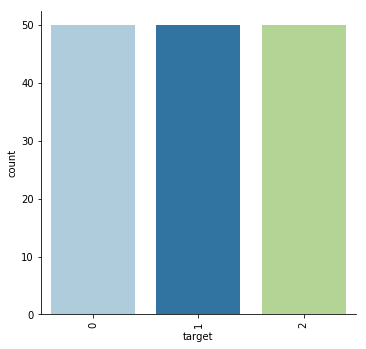

In [16]:
order = [0,1,2]
sns.catplot(x="target", kind="count",
            data=iris_df, order=order,
            palette="Paired").set_xticklabels(rotation=90)

# Browse OS
- Outputs a list of file in current directory that is of type [specified]

In [22]:
import os
from os import listdir
from os.path import isfile, join

#Find CSV
mypath = os.getcwd().replace("\\","/") 
onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f))) & f.endswith(".csv")]

# Joining 2 Dataframes
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html  

``` python
pd.concat([df1, df1])
```

# Linear Regression
- Boston Dataset (boston_df)

In [23]:
import statsmodels.api as sm
import numpy as np

## Simple Linear Regression on MEDV ~ LSTAT 

In [25]:
predictor = ['LSTAT']

In [26]:
Y = boston_df['MEDV']
X = boston_df[predictor]

In [27]:
X = sm.add_constant(X.values)
X = pd.DataFrame(X, columns= ['Intercept'] + predictor) #insert column names

In [28]:
model = sm.OLS(Y,X)
results = model.fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        23:52:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### Obtain Coefficient

In [30]:
results.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

### Obtain Confidence Interval of Coefficient 

In [31]:
results.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


### Obtain Predictions of New Observations
 - Given new observation 5, 10, 15

In [32]:
results.predict(sm.add_constant(np.array([5,10,15])))

array([29.80359411, 25.05334734, 20.30310057])

### Obtain Confidence and Prediction Intervals for Prediction
- Prediction Intervals are always wider than confidence Intevals
- Prediction Intervals incorporates both reducible error in the estimation of unknown f(x) as well as the irreducible  
  in how much an individual point will differ from the population regression plane
- Prediction intervals are for individual obersations, whearas confidence intervals are for average response

In [33]:
results.get_prediction(sm.add_constant(np.array([5,10,15]))).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


## Multiple Linear Regression on MEDV ~ . 

In [ ]:
import statsmodels.api as sm
import numpy as np

In [50]:
Y = boston_df['MEDV']

In [48]:
X = sm.add_constant(boston_df.iloc[:,:-1].values)
X = pd.DataFrame(X, columns= ["Intercept"] + list(boston_df.columns)[:-1]) #insert column names

In [51]:
model = sm.OLS(Y,X)
results = model.fit()

In [52]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        00:39:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

## R-style formula
click [here](https://www.statsmodels.org/stable/index.html) to read more about statmodel's R-Style usecase

- Handles Interaction Terms
- Categorical Variables

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [62]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [60]:
# title of dataset
sm.datasets.get_rdataset("Guerry", "HistData").title

'Data from A.-M. Guerry, "Essay on the Moral Statistics of France"'

In [63]:
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [64]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [65]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.90e-08
Time:                        11:57:59   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

### Interaction Terms
- “:” adds a new column to the design matrix with the product of the other two columns.
- “*” will also include the individual columns that were multiplied together 

In [67]:
result = smf.ols(formula='Lottery ~ Literacy : Wealth', data=dat).fit()

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.341
Date:                Thu, 23 Apr 2020   Prob (F-statistic):              0.130
Time:                        12:00:09   Log-Likelihood:                -397.06
No. Observations:                  86   AIC:                             798.1
Df Residuals:                      84   BIC:                             803.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.1857      4.382     

In [69]:
result = smf.ols(formula='Lottery ~ Literacy * Wealth', data=dat).fit()

In [70]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     11.13
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           3.33e-06
Time:                        12:01:05   Log-Likelihood:                -383.56
No. Observations:                  86   AIC:                             775.1
Df Residuals:                      82   BIC:                             784.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.8437     16.190     

### Categorical Variables
We can use the function C() to to indicate that the variable is a categorical variable

In [71]:
result = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=dat).fit()

In [72]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.07e-05
Time:                        12:03:23   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.6517      9.456      4.